In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import os
import sys
import datetime
from subprocess import call
import subprocess
import glob
import djPyBio as DJ
from djPyBio import Common as CM
from djPyBio import mpltools as axtools


import pandas as pd
import csv
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy 
import pybedtools as pbt
import ciepy
import cardipspy as cpy
import itertools
import tempfile
import six
import networkx as nx
import scipy.stats as stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
from mpl_toolkits.axes_grid1 import  make_axes_locatable
import datetime

from scipy.stats import mode
dy_name = 'intensity_array_processing'

private_out = os.path.join(DJ.root, 'private_output', dy_name)
if not os.path.exists(private_out):
    cpy.makedir(private_out)

/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
fn = '/frazer01/projects/CARDIPS/data/rsng/160511/mathias_rsng_g235_frazer_lookup_table.txt'
array_data = pd.read_table(fn)
fn = '/frazer01/projects/CARDIPS/analysis/cardips-cnv-analysis/private_output/array_qc_checking/info.csv'
plate_map = pd.read_csv(fn, index_col=0)

plate_map['group']= plate_map.Sample_Plate.apply(lambda x: x.split('_')[0])
frazer_samples = plate_map[plate_map.group == 'frazer']

fn = '/frazer01/projects/CARDIPS/data/rsng/160511/mathias_rsng_g235_frazer_lookup_table.txt'
lookup = pd.read_table(fn)
lookup['sample_ID']= lookup['UDF/Investigator Sample Name'].apply(lambda x: x.split('_')[0])
array_wgs_uuid['Sample_ID'] = array_wgs_uuid.Arrays.apply(lambda x: CM.UUID_Dicts[x])

lookup = lookup[lookup.sample_ID.isin(array_wgs_uuid.Sample_ID)]
lookup = lookup[lookup['UDF/Sample Source'].isin(['Blood', 'Fibroblast'])]
frazer_samples['Sample_ID'] = frazer_samples.Sample_ID.astype(int)
frazer_samples = frazer_samples[frazer_samples.Sample_ID.isin(lookup['Sample/Name'])]

frazer_samples.index = frazer_samples.Sample_ID
lookup.index =  lookup['Sample/Name']

combined_table = frazer_samples.join(lookup)
combined_table.rename(columns={'sample_ID': 'Subject_UUID'}, inplace=True)
combined_table['WGS_UUID'] = combined_table.Subject_UUID.apply(lambda x: CM.Subj_dict[x])

In [104]:
import statsmodels.api as sm 

/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
array_sample_info = pd.read_pickle('/frazer01/projects/CARDIPS/analysis/cardips-cnv-analysis/private_output/intensity_array_processing/array_sample_info.pkl')


In [50]:
samples = df.iloc[ :,4:].columns.tolist()

In [98]:
array_sample_info.index = array_sample_info.WGS_UUID

dict_batch = array_sample_info.Batch.to_dict()

batch_row = [dict_batch[i] for i in samples]
batch_row = [str(i) +'_Batch' for i in batch_row]

In [6]:
fn = '/frazer01/projects/CARDIPS/data/rsng/160823/extracted_arrays/combined_array.txt'
df = pd.read_table(fn)
df.index = df.ID
df = df.dropna()

df.to_csv('/frazer01/projects/CARDIPS/data/rsng/160823/extracted_arrays/combined_array_filt.txt')

#Truncate a file for PCA its pretty huge

dft = df.head(1000000)
array = dft[samples]
array = array.dropna().T
X = array.values


/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [150]:
#Truncate a file for this testing

dft = df.head(1000000)

In [151]:
array = dft[samples]

array = array.dropna().T

X = array.values

In [120]:

from sklearn.decomposition import PCA as sklearnPCA

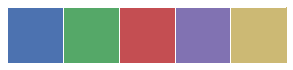

In [140]:
y = array_sample_info.Batch.values

z = array_sample_info.Plate.values

# from sklearn.preprocessing import StandardScaler
# X_std = StandardScaler().fit_transform(X)

sklearn_pca = sklearnPCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

# sklearn_pca.explained_variance_ratio_

# sklearn_pca.explained_variance_ratio_

pal = sns.palplot(sns.color_palette(n_colors=5))
pal_batch = sns.color_palette(n_colors=5)
pal_labs_batch = zip(pal_batch, [2,3,4,5,18])
pal_plate = sns.color_palette(n_colors=8)
pal_labs_plate = zip(pal_plate, [2,3,4,5,6,7,28,29])


In [ ]:
# save the predictors columns in order to not have to generate this again 
CM.save_dataframe('predictors', tdf[cols], private_out)

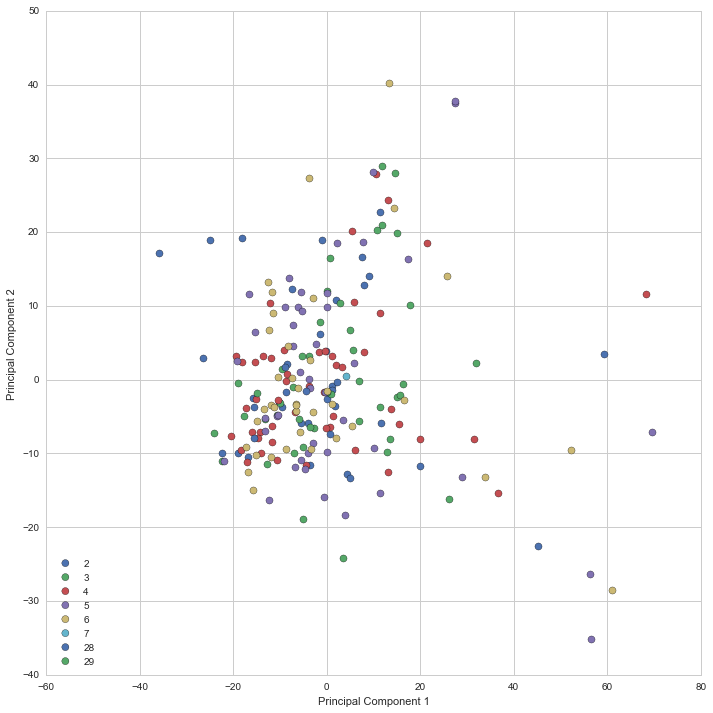

In [142]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    for col, lab in pal_labs_plate:
        
        plt.scatter(Y_sklearn[z==lab, 0],
                    Y_sklearn[z==lab, 1],
                    label=lab,
                    c=col, 
                   s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

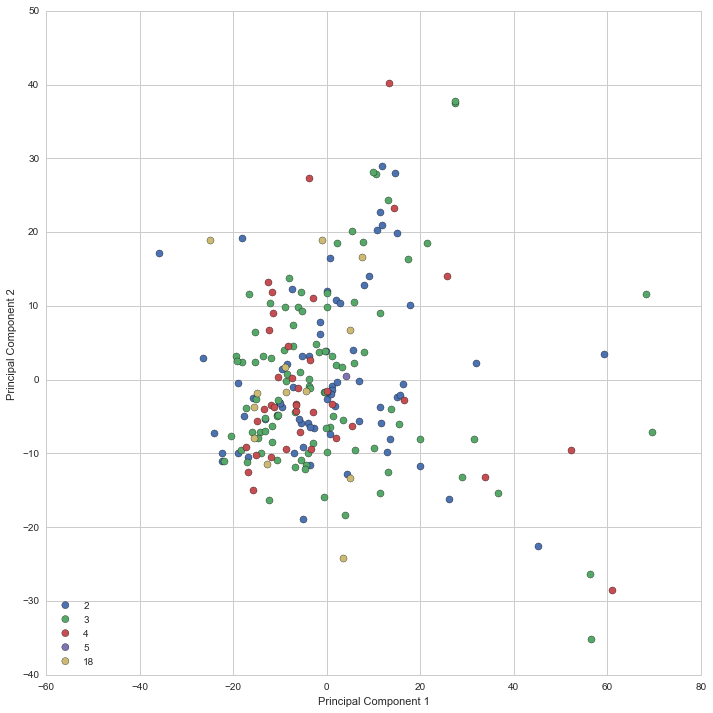

In [143]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    for col, lab in pal_labs_batch:
        
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    s=50,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

In [97]:

# dict_plate = array_sample_info.Plate.to_dict()
# plate_row = [dict_plate[i] for i in samples]
# plate_row  =[str(i) +'_Plate' for i in plate_row]

In [170]:
CM.save_dataframe('array_trunc', test, private_out)


array_trunc = pd.read_pickle('/frazer01/projects/CARDIPS/analysis/cardips-cnv-analysis/private_output/intensity_array_processing/array_trunc.pkl')
array_trunc = pd.read_csv('/frazer01/projects/CARDIPS/analysis/cardips-cnv-analysis/private_output/intensity_array_processing/array_trunc.tsv', sep='\t')
# all vars recorded: /frazer01/projects/CARDIPS/analysis/cardips-cnv-analysis/private_output/intensity_array_processing/load_saved_nb_variables.py
# pickled vars recorded:/frazer01/projects/CARDIPS/analysis/cardips-cnv-analysis/private_output/intensity_array_processing/load_pickled_nb_variables.py
